In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

%matplotlib inline

In [7]:
with open("../../data/umbra_contract_txs.json", "r") as file:
    contract_txs = json.load(file)["result"] #all the transactions' details related to the umbra contract

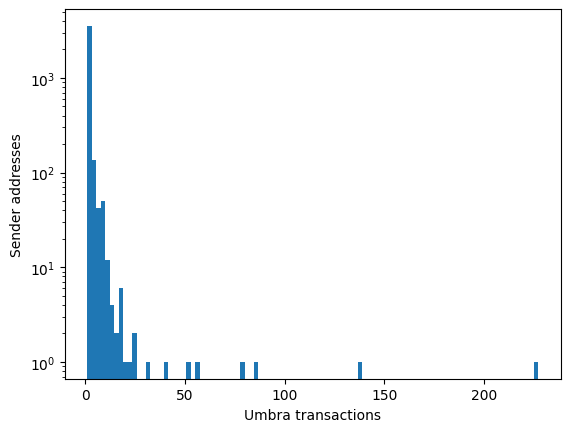

In [27]:
txs_to_contract = []

for c in contract_txs:
    txs_to_contract.append(c["from"])

adresses_of_txs_to_contract_series = pd.Series(txs_to_contract, name="Txs count grouped by addressess")
adresses_of_txs_to_contract_count = adresses_of_txs_to_contract_series.value_counts()
df = pd.DataFrame({"Address": adresses_of_txs_to_contract_count.index, "Count": adresses_of_txs_to_contract_count.values})

plt.hist(adresses_of_txs_to_contract_count.values,bins=100)
plt.ylabel('Sender addresses')
plt.xlabel('Umbra transactions')
plt.yscale("log")
#print(mean(adresses_of_txs_to_contract_count.values))

In [ ]:
#df.plot.axes.get_xaxis().set_visible(False)
# ax = df.plot.bar(rot=0, figsize=(20,10))
# ax.set(xticklabels=[])
# plt.yscale('log')
# plt.show()

6256


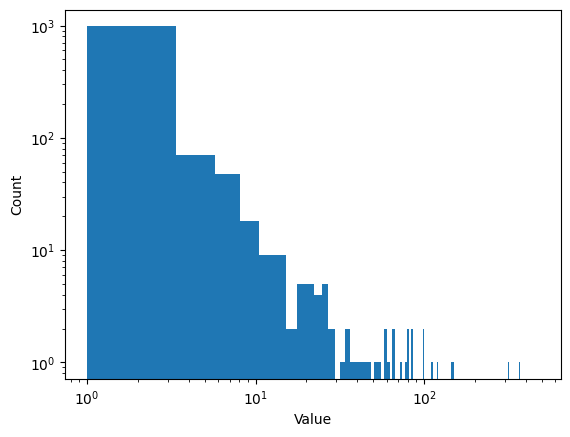

In [17]:
amounts = []

for d in contract_txs:
    if d["functionName"] == "sendEth(address _receiver, uint256 _tollCommitment, bytes32 _pkx, bytes32 _ciphertext)":
        amounts.append(int(d["value"])/pow(10, 18))

print(len(amounts))

amounts = pd.Series(amounts, name="Wei amounts")
amounts_count = amounts.value_counts()
df = pd.DataFrame({"Value": amounts_count.index, "Count": amounts_count.values})

plt.hist(amounts_count.values,bins=200)
plt.ylabel('Count')
plt.xlabel('Value')
plt.yscale("log")
plt.xscale("log")

In [8]:
from web3 import Web3
from ens import ENS
from ens import exceptions
from dotenv import load_dotenv

load_dotenv()
ETHERSCAN_API_KEY = os.environ["ETHERSCAN_API_KEY"]
WEB3_WEBSOCKET_PROVIDER = os.environ["WEB3_WEBSOCKET_PROVIDER"]

w3 = Web3(Web3.WebsocketProvider(WEB3_WEBSOCKET_PROVIDER))
ns = ENS.fromWeb3(w3)

In [18]:
# When the sender address of the eth is the same as the final receiver
import sys
sys.path.append('../../src/')
from get_ens_name import get_ens_name

ens_database = "../../data/ens_database.json"

with open(ens_database, "r") as file:
    ens_db = json.load(file)

chain = []
n = 0
for d in contract_txs:
    n+=1
    if d["functionName"] == "sendEth(address _receiver, uint256 _tollCommitment, bytes32 _pkx, bytes32 _ciphertext)":
        k = d[d["functionName"]]["_receiver"]
        for tx in d[d["functionName"]][k]:
            if d["from"] == tx["to"]:
                chain.append({"tx": d["hash"], "address": d["from"]})
    elif d["functionName"] == "withdrawTokenOnBehalf(address _stealthAddr, address _acceptor, address _tokenAddr, address _sponsor, uint256 _sponsorFee, uint8 _v, bytes32 _r, bytes32 _s)":
        if d["from"] == d[d["functionName"]]["_acceptor"]:
            chain.append({"tx": d["hash"], "address": d["from"]})

n = 0
for d in chain:
    n+=1
    try:
        get_ens_name(d, "address", "ens", ns, ens_db)
    except exceptions.InvalidName as err:
        print(f"Error occured at the {n}th item: {err}\nContinuing the process...")

with open(ens_database, "w") as file:
    json.dump(ens_db, file)

with open("../same_sender_receiver.json", "w") as file:
    json.dump(chain, file)

with open("../same_sender_receiver_ens.json", "w") as file:
    json.dump(list(filter(lambda i: "ens" in i, chain)), file)

KeyError: 'sendEth(address _receiver, uint256 _tollCommitment, bytes32 _pkx, bytes32 _ciphertext)'

In [ ]:
# When the receiver address of the eth has an address which has communicated with stealth registry
import sys
sys.path.append('../../src/')
from get_ens_name import get_ens_name

ens_database = "../../data/ens_database.json"

with open("../../data/umbra_contract_txs.json", "r") as file:
    contract_txs = json.load(file)["result"]

with open("../../data/stealth_contract_txs.json", "r") as file:
    stealth_contract_txs = json.load(file)["result"]

with open(ens_database, "r") as file:
    ens_db = json.load(file)

chain = []
n = 0
for d in contract_txs:
    n+=1
    if d["functionName"] == "sendEth(address _receiver, uint256 _tollCommitment, bytes32 _pkx, bytes32 _ciphertext)":
        k = d[d["functionName"]]["_receiver"]
        for tx in d[d["functionName"]][k]:
            if d["from"] == tx["to"]:
                chain.append({"tx": d["hash"], "address": d["from"]})
    elif d["functionName"] == "withdrawTokenOnBehalf(address _stealthAddr, address _acceptor, address _tokenAddr, address _sponsor, uint256 _sponsorFee, uint8 _v, bytes32 _r, bytes32 _s)":
        if d["from"] == d[d["functionName"]]["_acceptor"]:
            chain.append({"tx": d["hash"], "address": d["from"]})

n = 0
for d in chain:
    n+=1
    try:
        get_ens_name(d, "address", "ens", ns, ens_db)
    except exceptions.InvalidName as err:
        print(f"Error occured at the {n}th item: {err}\nContinuing the process...")

with open(ens_database, "w") as file:
    json.dump(ens_db, file)

with open("../same_sender_receiver.json", "w") as file:
    json.dump(chain, file)

with open("../same_sender_receiver_ens.json", "w") as file:
    json.dump(list(filter(lambda i: "ens" in i, chain)), file)